## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
iris= pd.read_csv('iris.csv')

In [3]:
# few rows of the dataset
iris = iris.drop(columns = ['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# statistics of the dataset
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# dataset information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#Value counts of the target variable
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
# shape of the dataset
iris.shape

(150, 5)

In [8]:
# Check for missing values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis 

Text(0.5, 1.0, 'Sepal length')

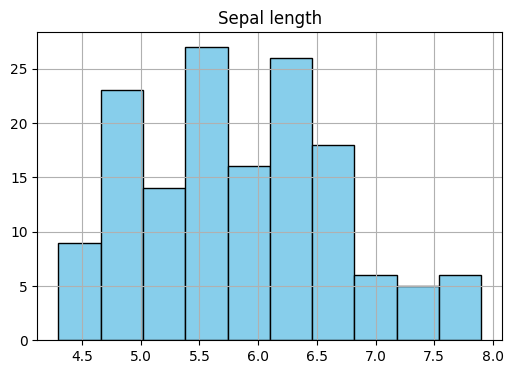

In [9]:
plt.figure(figsize=(6, 4))
iris['SepalLengthCm'].hist(color='skyblue', edgecolor='black')
plt.title('Sepal length')

Text(0.5, 1.0, 'Sepal Width')

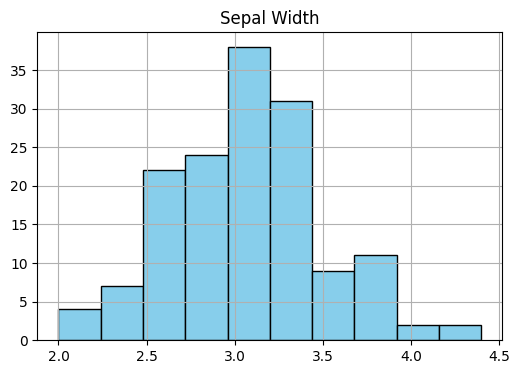

In [10]:
plt.figure(figsize=(6, 4))
iris['SepalWidthCm'].hist(color='skyblue', edgecolor='black')
plt.title('Sepal Width')

Text(0.5, 1.0, 'Petal Length')

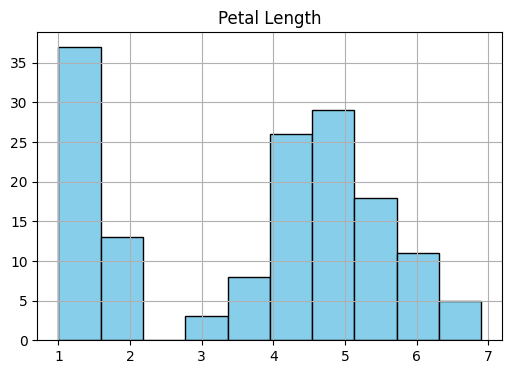

In [11]:
plt.figure(figsize=(6, 4))
iris['PetalLengthCm'].hist(color='skyblue', edgecolor='black')
plt.title('Petal Length')

Text(0.5, 1.0, 'petal Width')

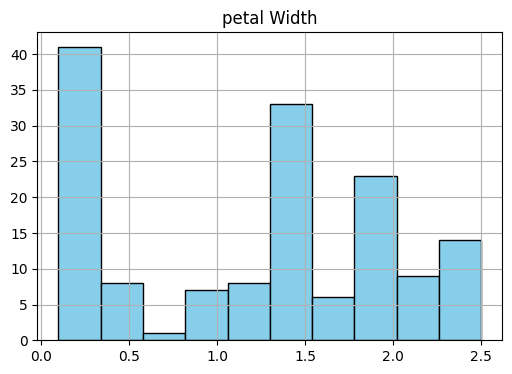

In [12]:
plt.figure(figsize=(6, 4))
iris['PetalWidthCm'].hist(color='skyblue', edgecolor='black')
plt.title('petal Width')

In [13]:
# scatterplot
colors = ['black', 'red', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

Text(0.5, 1.0, 'Sepal Length - Sepal Width')

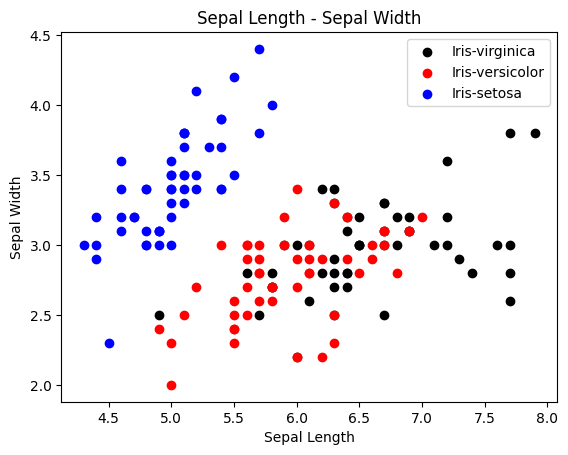

In [14]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title('Sepal Length - Sepal Width')

Text(0.5, 1.0, 'Petal Length - Petal Width')

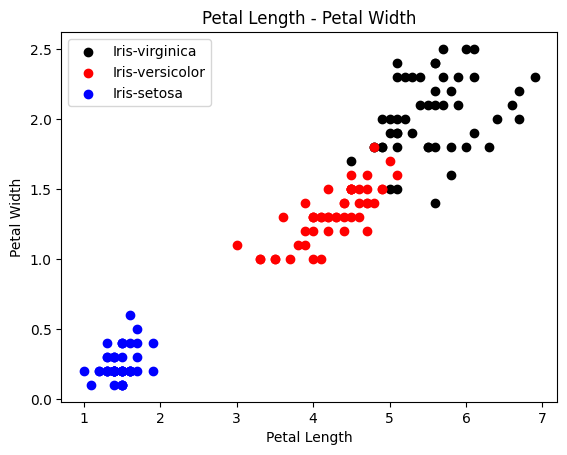

In [15]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title('Petal Length - Petal Width')

Text(0.5, 1.0, 'Sepal Length - Petal Length')

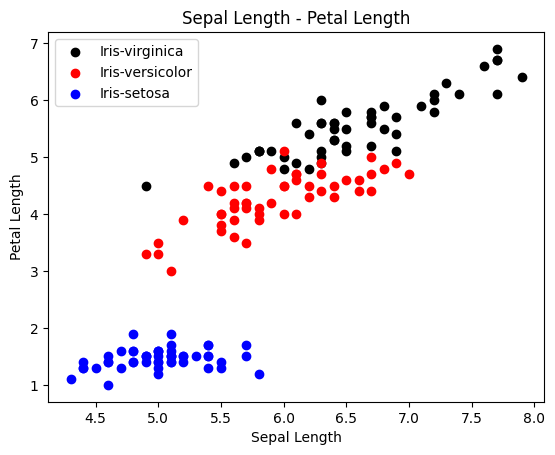

In [16]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.title('Sepal Length - Petal Length')

Text(0.5, 1.0, 'Sepal Width - Petal Width')

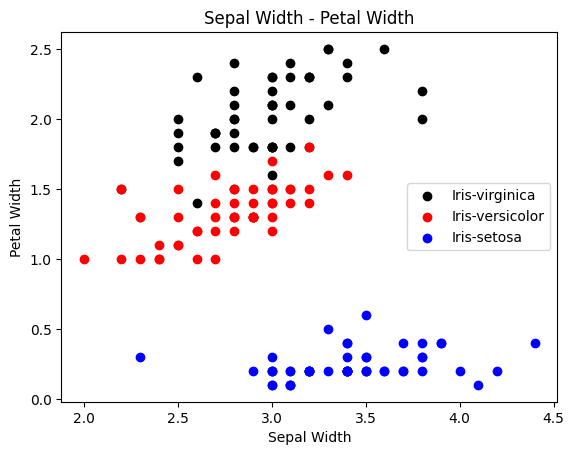

In [17]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.title('Sepal Width - Petal Width')

<Axes: >

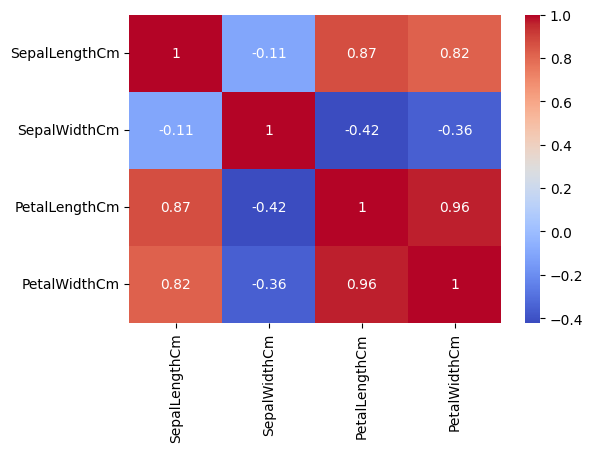

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(iris.drop('Species',axis=1).corr(),annot=True,cmap='coolwarm')

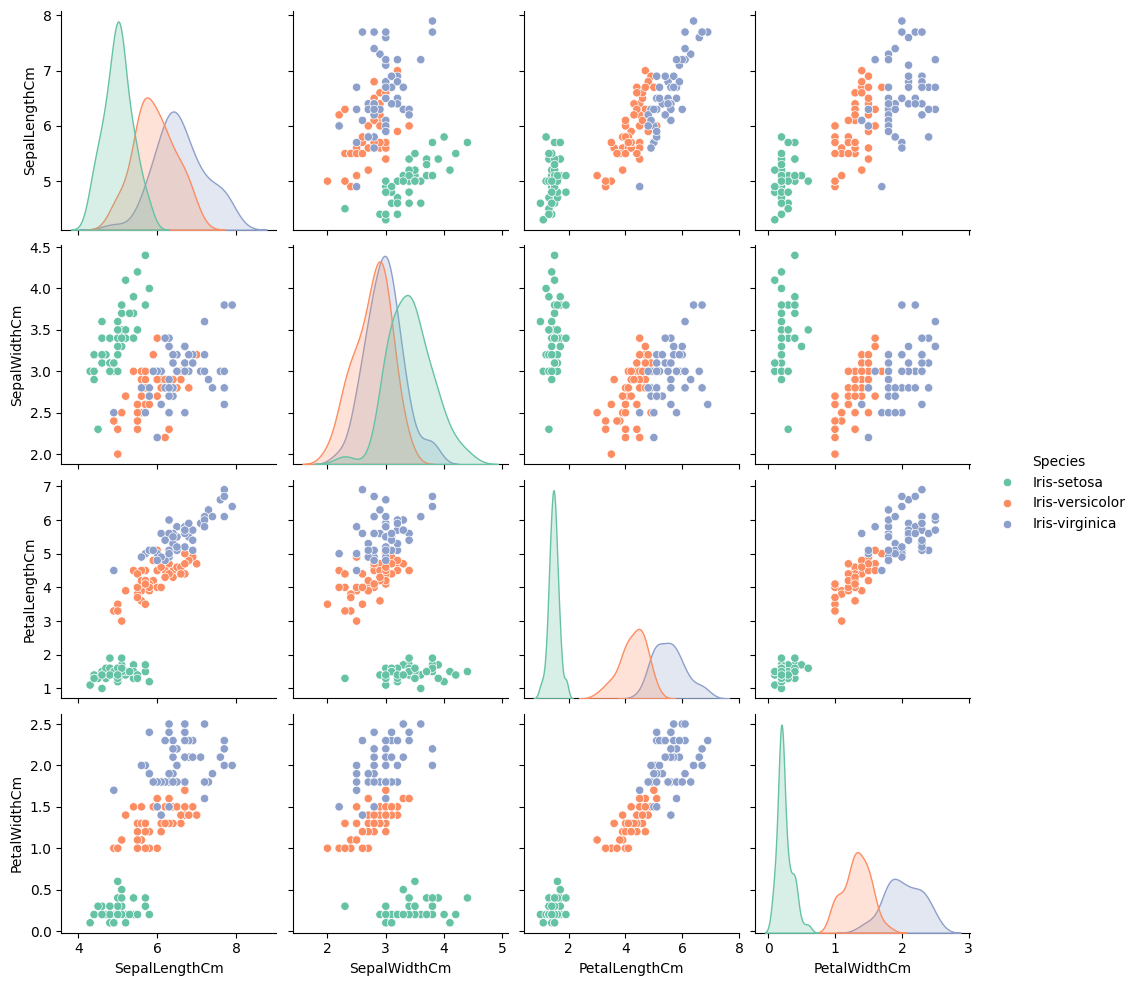

In [19]:
# Pairplot for visualizing relationships
sns.pairplot(iris, hue='Species', palette='Set2')
plt.show()

## Training The Model

In [20]:
# Seperating the data into dependent and independent variables
x= iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [21]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

y_pred =logreg_model.predict(x_test)

print('-'*10,"Classification report",'-'*10)
print(classification_report(y_test, y_pred))
print('-'*10,"Confusion Matrix",'-'*10)
print(confusion_matrix(y_test, y_pred))

print('-'*10,"Accuracy Score",'-'*10)
print('accuracy is',accuracy_score(y_pred,y_test)*100)

---------- Classification report ----------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

---------- Confusion Matrix ----------
[[15  0  0]
 [ 0 16  0]
 [ 0  0 14]]
---------- Accuracy Score ----------
accuracy is 100.0


In [22]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

print('-'*10,"Classification report",'-'*10)
print(classification_report(y_test, y_pred))
print('-'*10,"Confusion Matrix",'-'*10)
print(confusion_matrix(y_test, y_pred))

print('-'*10,"Accuracy Score",'-'*10)
print('accuracy is',accuracy_score(y_pred,y_test)*100)

---------- Classification report ----------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

---------- Confusion Matrix ----------
[[15  0  0]
 [ 0 16  0]
 [ 0  1 13]]
---------- Accuracy Score ----------
accuracy is 97.77777777777777


In [23]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

print('-'*10,"Classification report",'-'*10)
print(classification_report(y_test, y_pred))
print('-'*10,"Confusion Matrix",'-'*10)
print(confusion_matrix(y_test, y_pred))

print('-'*10,"Accuracy Score",'-'*10)
print('accuracy is',accuracy_score(y_pred,y_test)*100)

---------- Classification report ----------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

---------- Confusion Matrix ----------
[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]
---------- Accuracy Score ----------
accuracy is 97.77777777777777


## Prediction

In [24]:
def predict_species(model, features):
    prediction = model.predict([features])
    return prediction[0]

# Take input from the user for a new Iris flower
print("Please enter the measurements of the new Iris flower:")

sepal_length = float(input("Enter Sepal Length: "))
sepal_width = float(input("Enter Sepal Width: "))
petal_length = float(input("Enter Petal Length: "))
petal_width = float(input("Enter Petal Width: "))

new_features = [sepal_length, sepal_width, petal_length, petal_width]

# Predict the species using the logistic regression model
predicted_species = predict_species(logreg_model, new_features)
print(f"The predicted species using logistic regression is: {predicted_species}")
# Predict the species using the DecisionTreeClassifier model
predicted_species = predict_species(dt_model, new_features)
print(f"The predicted species using decision tree is: {predicted_species}")
# Predict the species using the KNeighborsClassifier model
predicted_species = predict_species(knn_model, new_features)
print(f"The predicted species using KNeighborsClassifier is: {predicted_species}")


Please enter the measurements of the new Iris flower:
The predicted species using logistic regression is: Iris-versicolor
The predicted species using decision tree is: Iris-virginica
The predicted species using KNeighborsClassifier is: Iris-virginica


## Saving The Model

In [25]:
import pickle

In [26]:
file='model.sav'
pickle.dump(knn_model,open(file,'wb'))

In [27]:
load_model=pickle.load(open(file,'rb'))

In [28]:
load_model.predict([(1.0,1.2,2.0,5.0)])

array(['Iris-setosa'], dtype=object)